# SEMANTIVE: DATA SCIENTIST RECRUITMENT TASK

##### Please download and load the  [abalone dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/).  

##### You can use information from [this](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names) file to add the proper headers to the columns. 

The whole task will be driven by supervised learning problem.
Let's define target variable as $Rings / 1.5$ (it rougly corresponds to abalone's age).  
We strongly encourage you use scikit-learn for the modeling tasks (but feel free to use different tools if you think they are appropriate).  

##### First 2 tasks are obligatory. From the tasks 3-5 you can pick and complete 2.

In [65]:
#A place for the imports
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import copy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer


downloaded_data  = urllib.request.urlopen('''https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
''')
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
xx = pd.read_csv(downloaded_data, names = column_names)


def PrepareData(data):
    Result = copy.deepcopy(data)
    Result.loc[Result.sex == 'I', 'sex'] = 0.
    Result.loc[Result.sex == 'M', 'sex'] = -1.
    Result.loc[Result.sex == 'F', 'sex'] = 1.
    return Result

X = PrepareData(xx)
X.astype(float)




,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,-1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,-1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,-1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
5,0.0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8.0
6,1.0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20.0
7,1.0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16.0
8,-1.0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9.0
9,1.0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19.0


***
# 1. Data exploration

##### Explore the data  and provide a short summary of your findings. Pay attention to the target variable.

In [66]:
print('The abalones are characterized by 9 atributes. The first four items are:')
print(X.head()) 
print('For sex atribute we identify: Infant<->0, Male<->-1, Female<->1 ')
print('The data consists of ', X.shape[0], ' items')
print('The maximal attained values of atributes are the following:')
print(X.max()) 
print('The minimal attained values of atributes are the following:')
print(X.min())
print('The correlation matrix has the following form')
print(X.corr())  
print('The data is complete, since the number of provided atributes equals the number of items for each atribute:')
print(X.count())
print("Some rings classes are not well populated. In particular there is no abalone with 28 rings:")
print(X.groupby('rings').count())
print('We can see, that the weight atribute is most strongly correlated with the number of rings.')
print(' Many atributes like length and dimater are strongly correlated (all abalones have similar shape).')
y = X.rings.values
del X["rings"]
print('Our target atribute is age which routhly equals the number of rings/1.5')
print('Its mean, maximum and minimum values respectively equal:')
print("%.2f" % (y.mean()/1.5))
print("%.2f" %  (y.max()/1.5))
print("%.2f" %  (y.min()/1.5))


The abalones are characterized by 9 atributes. The first four items are:
  sex  length  diameter  height  whole weight  shucked weight  viscera weight  \
0  -1   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1  -1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   1   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3  -1   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
For sex atribute we identify: Infant<->0, Male<->-1, Female<->1 
The data consists of  4177  items
The maximal attained values of atributes are the following:
sex                1.0000
length             0.8150
diameter           0.6500
height             1.1300
whole weight       2.8255
s

***
# 2. Supervised learning

##### Prepare the data for the modeling.  

###### Choose 2 supervised learning algorithms, that you think are suitable for this problem. Describe shortly how these algorithms work. Use them on the data and describe the results.  
  
Note. that we're more interested in comprehensive description and explanation of your choice than in model scores, so we don't expect you to tune your model yet.

Although the target variable is discrete, the number of attained values is quite big, and therefore the first algorithm I will test is based on regression and does not use classification. Since some of the provided atributes are highly correleted, the simple linear regression without some kind of dimensionality reduction may not work properly. Therefore my first choice is the DecisionTreeRegressor algorithm, which in some sense makes the feature selection by iterativly choosing splitting criteria. To be more precise I will use the DecisionTreeRegressor algorithm. The algorithm builts the tree iteratively (in top-down manner). The choice of splitting criteria (in defoult setting) is based on maximal variance reduction of creted nodes with respect to the original upper level node. In this way the most higly correleted features are not supposed to appear simultaneously as the splitting criteria in the same tree. The drawback of this algorithm is the risk, that it will find the "local mini

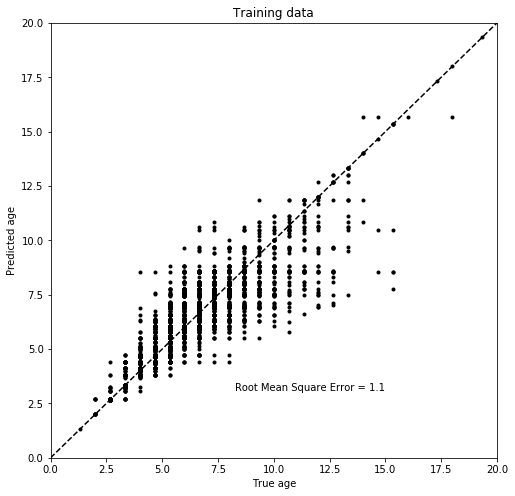

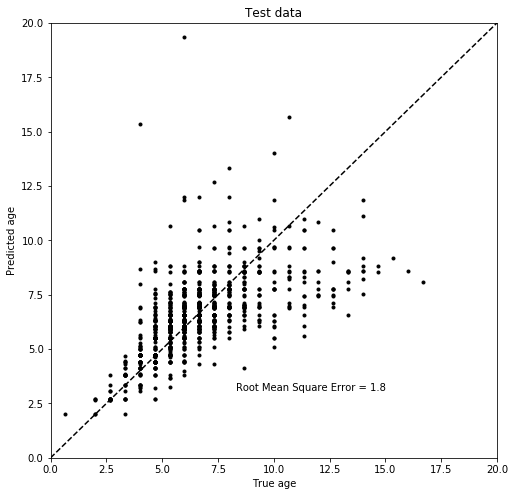

The next step can be to run the RandomForestRegressor, which would probablu give the better results. 
However, to try something significantly different we can try to use the fact, that the number of provided items 
is 2 orders of magnitude bigger than the number of attained target values. Therefore we can try to use selection 
algorithm to solve the task. As an exapmle of such algorithm I will try support vector machine classifier i.e. 
SVC model. It is based on maximazing the so-called geometric margin which aims to produce the prescription to optimally separate the items of two different classes. 
For many different classes (as in case of abalone data) the algorithm is used (by defoult) in "one vs one" manner.
The final algorithm solves the dual (to maximization) problem. Thanks to the KKT conditions the method is very 
efficient, since we need to compute only a few inner products of fetures vectors. Due to different kernels that
can be used the method can handle the very complex com

/home/michal/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


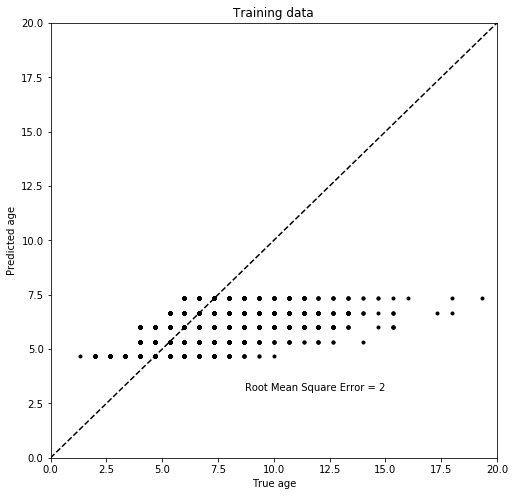

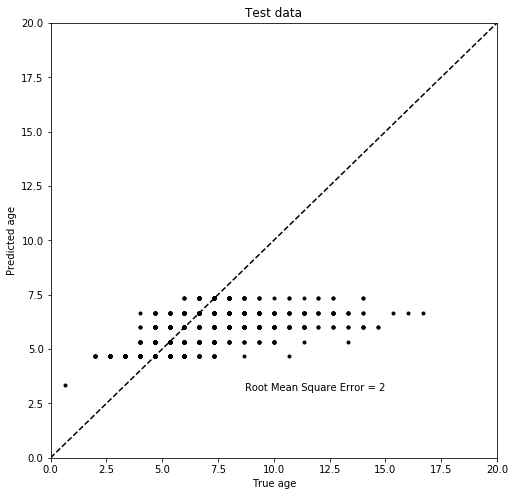

We can see, that this predictioner has worse accuracy than the DecisionTreeRegressor. The reason is probably the fact, that such the number of classes can be better treated as a regression problem.


In [67]:
print("""Although the target variable is discrete, the number of attained values is quite big, and therefore the first algorithm I will test is based on regression and does not use classification. Since some of the provided atributes are highly correleted, the simple linear regression without some kind of dimensionality reduction may not work properly. Therefore my first choice is the DecisionTreeRegressor algorithm, which in some sense makes the feature selection by iterativly choosing splitting criteria. To be more precise I will use the DecisionTreeRegressor algorithm. The algorithm builts the tree iteratively (in top-down manner). The choice of splitting criteria (in defoult setting) is based on maximal variance reduction of creted nodes with respect to the original upper level node. In this way the most higly correleted features are not supposed to appear simultaneously as the splitting criteria in the same tree. The drawback of this algorithm is the risk, that it will find the "local minimum" due to iteratively chosen spliting criteria, i.e. lack of backtracking. The results of aplying this algorithm to the abalone data is presented below (with simple default cross validation, i.e. using the random 75% of data as the training set):""")   

train_X, test_X, train_y, test_y = train_test_split(X, y)


model = DecisionTreeRegressor(max_depth=8)
model.fit(train_X, train_y/1.5)
predicted_test_y = model.predict(test_X)
predicted_train_y = model.predict(train_X)

def plot_y(true_y, predicted_y):
    """Scatter-plot the predicted vs true number of rings
    Returns the root mean square of the error
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(true_y, predicted_y, '.k')
    ax.plot([0, 20], [0, 20], '--k')
    rms = np.sqrt(mean_squared_error(true_y, predicted_y))
    ax.text(15, 3,
            "Root Mean Square Error = %.2g" % rms,
            ha='right', va='bottom')
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 20)
    ax.set_xlabel('True age')
    ax.set_ylabel('Predicted age')
    return rms


plot_y(train_y/1.5, predicted_train_y)
plt.title("Training data")
plot_y(test_y/1.5, predicted_test_y)
plt.title("Test data");
plt.show()


print("""The next step can be to run the RandomForestRegressor, which would probablu give the better results. 
However, to try something significantly different we can try to use the fact, that the number of provided items 
is 2 orders of magnitude bigger than the number of attained target values. Therefore we can try to use selection 
algorithm to solve the task. As an exapmle of such algorithm I will try support vector machine classifier i.e. 
SVC model. It is based on maximazing the so-called geometric margin which aims to produce the prescription to optimally separate the items of two different classes. 
For many different classes (as in case of abalone data) the algorithm is used (by defoult) in "one vs one" manner.
The final algorithm solves the dual (to maximization) problem. Thanks to the KKT conditions the method is very 
efficient, since we need to compute only a few inner products of fetures vectors. Due to different kernels that
can be used the method can handle the very complex combinations of atributes as the features vectors. 
The drawback of the method in case of abalone data is the huge number of classes (i.e. 29) and the neccesity to
run the classifier 28*(28-1)/2 times on small training sets (on avarage they have approximately 100 items).
In particular the algorithm can not predict the number of rings different than those, which appear in training set,which can happen in nature.
However the probablity of such event is very small due to big size of dataset as compared to the number of classes.  
The default kernel is 'rbf' i.e. radial basis function kernel. The results of this method are presented below:
""")


model2 = SVC()
model2.fit(train_X, train_y)
SVCpredicted_test_y = model2.predict(test_X)/1.5
SVCpredicted_train_y = model2.predict(train_X)/1.5

plot_y(train_y/1.5, SVCpredicted_train_y)
plt.title("Training data")
plot_y(test_y/1.5, SVCpredicted_test_y)
plt.title("Test data");
plt.show()

print("We can see, that this predictioner has worse accuracy than the DecisionTreeRegressor. The reason is probably the fact, that such the number of classes can be better treated as a regression problem.")

***
# Other tasks - Pick 2 of them



# 3. Dimensionality reduction


##### What are the applications of the dimensionality reduction?   

###### Pick two algorithms that could be useful for exploration or supervised learning problem and apply them on the data. Describe what you've found. Provide a short description of the algorithms you've chosen.

Note: feature selection is also one type of dimensionality reduction.

Dimensionality reduction reduce the number of features used in learning and predicting the value of target variable. It reduces the computational cost of the machine learning procedure, helps to skip the irrelevant features and can favour the features which are highly correleted with target variable. It can also eliminate highly correlated features which improves the accuracy of fit for some models. Since the abalone features are highly correleted the dimensionality reduction should not spoil significantly the accuracy of prediction.
The first dimensionality reduction algorithm I will test is based on Principal Components Analysis (PCA), which proviedes the demanded number of vectors in the features space (the linear combinations of features), which are minimally correlated with each other.
For example for 4 features vectors with SVC algorithm it gives the following results:
SVCPCA


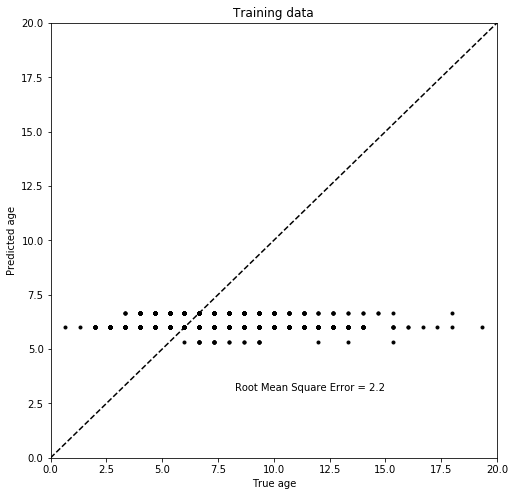

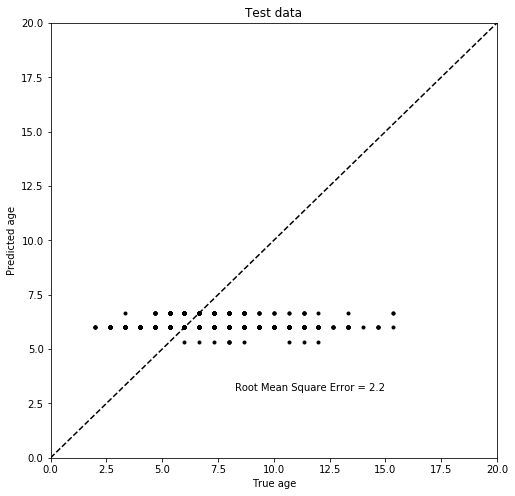

The results show that in case of SVC model the dimensionality reduction caused the significant decrease of the prediction accuracy.

We can try to fit DecisionTreeRegressor with reduced dimensionality of featuress:
DTRPCA


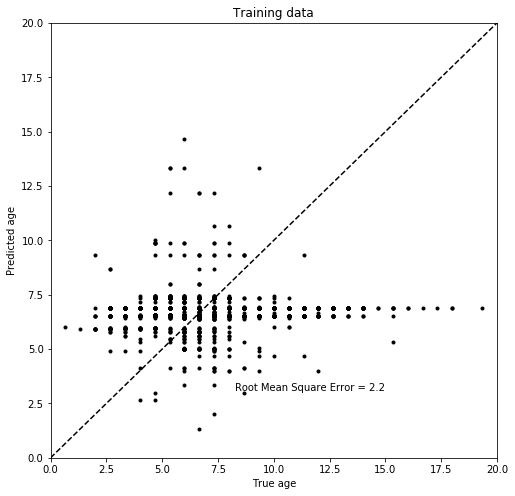

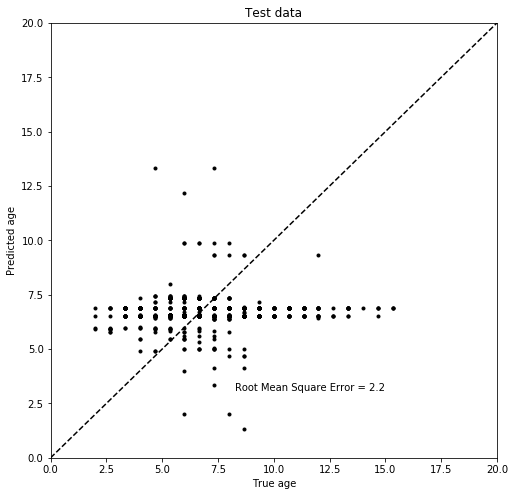

Again the accuracy decreased significantly.

The second algorithm which contains the dimensionality reduction in its structure is (for example) the linear discriminant analysis - LDA. It assumes, that for each target variable class, the features are distributed according to gaussian PD with shared (same for every class) covariance matrix. It reduces the atributes space to the dimension min(number of features,number of classes-1). It means that for abalone data set it does not really reduce the number of features, but in many other cases it does.
The results of LDA on the abalone data are the following
LDA


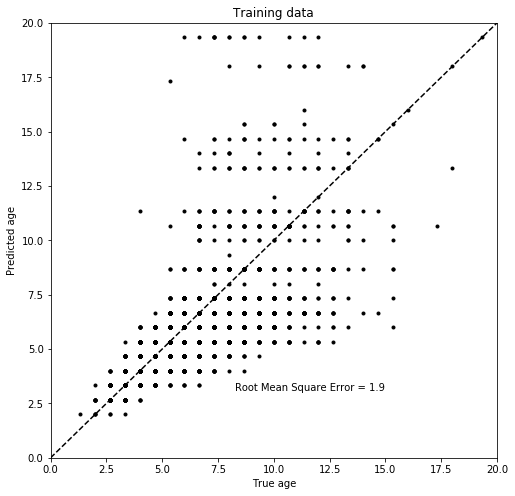

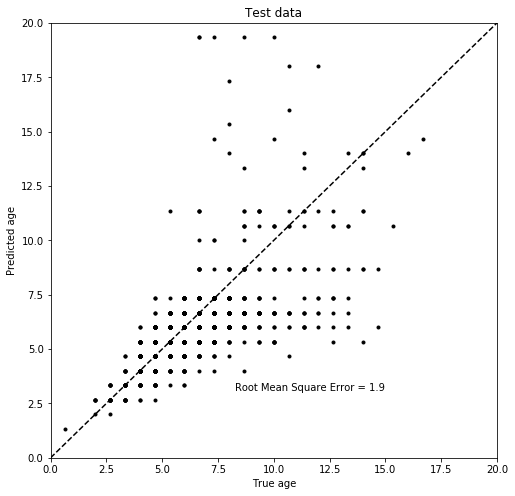

In [68]:
print("Dimensionality reduction reduce the number of features used in learning and predicting the value of target variable. It reduces the computational cost of the machine learning procedure, helps to skip the irrelevant features and can favour the features which are highly correleted with target variable. It can also eliminate highly correlated features which improves the accuracy of fit for some models. Since the abalone features are highly correleted the dimensionality reduction should not spoil significantly the accuracy of prediction.")
print("The first dimensionality reduction algorithm I will test is based on Principal Components Analysis (PCA), which proviedes the demanded number of vectors in the features space (the linear combinations of features), which are minimally correlated with each other.")
print("For example for 4 features vectors with SVC algorithm it gives the following results:")

pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)

train_Xpca, test_Xpca, train_ypca, test_ypca = train_test_split(X_pca, y)

modelPCA = SVC(gamma='scale')
modelPCA.fit(train_Xpca, train_y)
SVCPCApredicted_test_y = modelPCA.predict(test_Xpca)/1.5
SVCPCApredicted_train_y = modelPCA.predict(train_Xpca)/1.5

plot_y(train_ypca/1.5, SVCPCApredicted_train_y)
plt.title("Training data")
plot_y(test_ypca/1.5, SVCPCApredicted_test_y)
plt.title("Test data");
print("SVCPCA")
plt.show()
print("The results show that in case of SVC model the dimensionality reduction caused the significant decrease of the prediction accuracy.")
print('')
print("We can try to fit DecisionTreeRegressor with reduced dimensionality of featuress:")

model2PCA = DecisionTreeRegressor(max_depth=8)
model2PCA.fit(train_Xpca, train_y/1.5)
DTRPCApredicted_test_y = model2PCA.predict(test_Xpca)
DTRPCApredicted_train_y = model2PCA.predict(train_Xpca)

plot_y(train_ypca/1.5, DTRPCApredicted_train_y)
plt.title("Training data")
plot_y(test_ypca/1.5, DTRPCApredicted_test_y)
plt.title("Test data");
print("DTRPCA")
plt.show()
print("Again the accuracy decreased significantly.")
print("")

print("The second algorithm which contains the dimensionality reduction in its structure is (for example) the linear discriminant analysis - LDA. It assumes, that for each target variable class, the features are distributed according to gaussian PD with shared (same for every class) covariance matrix. It reduces the atributes space to the dimension min(number of features,number of classes-1). It means that for abalone data set it does not really reduce the number of features, but in many other cases it does.")
print("The results of LDA on the abalone data are the following")
modelLDA =  LinearDiscriminantAnalysis()
modelLDA.fit(train_X, train_y)
LDApredicted_test_y = modelLDA.predict(test_X)/1.5
LDApredicted_train_y = modelLDA.predict(train_X)/1.5

plot_y(train_y/1.5, LDApredicted_train_y)
plt.title("Training data")
plot_y(test_y/1.5, LDApredicted_test_y)
plt.title("Test data");
print("LDA")
plt.show()




# 4. Clustering

##### What is clustering used for? Name the popular types of clustering. Pick two clustering algorithms and run them on the dataset. Describe what you've found. Does it help with the supervised learning task?


# 5. Hyperparameter selection and crossvalidation

##### We imagine that you did some modeling in 2nd task with the methods that have some tunable hyperparameters. If they don't, either find a versions of them that have that are tunable, or pick the different ones.

##### Tune the hyperparameters of your model using cross-validation. Does it make it better? Does it solve overfitting problems? Is cross-validation score worse than score that your model achieves on test set?

Since we have the very small number of samples for some classes, there is a bigger chance to ommit some 
classes while using the k-fold splitting during cross validation, then while working on one initial 
train/test split (especially for SVC algorithm). Therefore we use this second option in our tuning procedure.
First we tune the SVC model checking different parameters C from set {0.01, 0.1, 1, 2, 3, 10, 40, 100, 500, 1000} and gamma from set {0.1, 0.01, 1e-3, 1e-4} and minimizing the mean squared 
error obtained on test data.
The parameters providing the best fit are:
C= 500  gamma= 0.1
The results of such tuned predictioner are:
TunedSVC


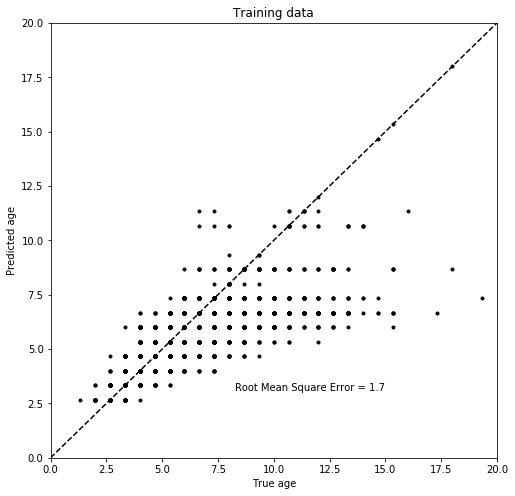

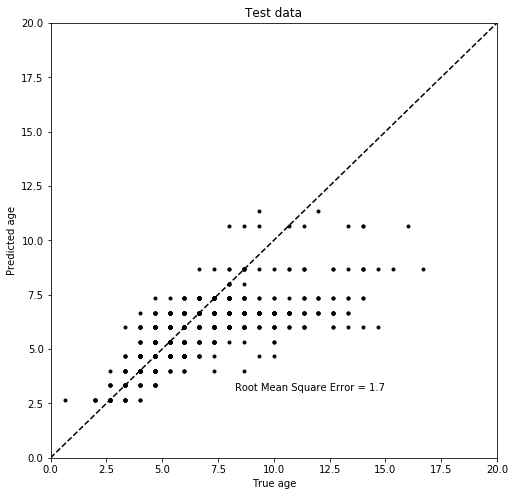

Second we tune the DecisionTreeRegressor model checking different maximal depth (from set {2, 4, 6, 8, 10, 14}) of created tree.
The reduced depth helps to avoid overfitting.
The maximal depth providing the best fit is:
max_depth= 4
The results of tuned predictioner are:
TunedDTR


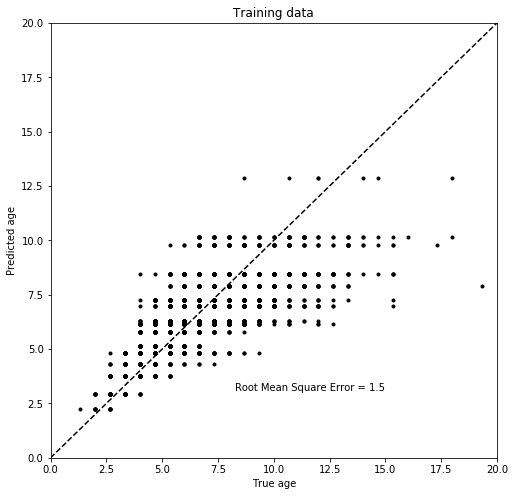

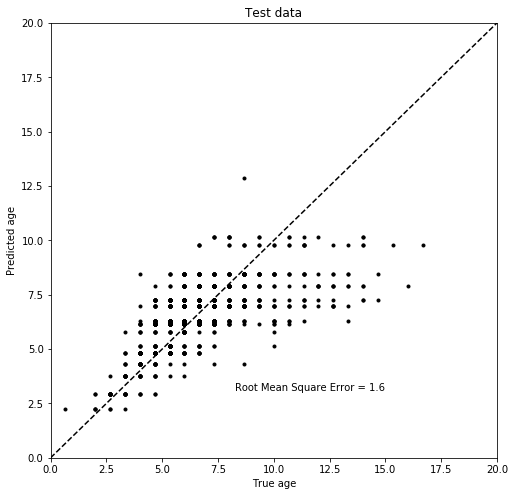

The accuracy of tuned models are better than the accuracy of models with defoult parameters.


In [69]:

mse = list([])
minmse = 50
localiter = 0
miniter = 5000

print("""Since we have the very small number of samples for some classes, there is a bigger chance to ommit some 
classes while using the k-fold splitting during cross validation, then while working on one initial 
train/test split (especially for SVC algorithm). Therefore we use this second option in our tuning procedure.""")
print("""First we tune the SVC model checking different parameters C from set {0.01, 0.1, 1, 2, 3, 10, 40, 100, 500, 1000} and gamma from set {0.1, 0.01, 1e-3, 1e-4} and minimizing the mean squared 
error obtained on test data.""")
for CC in [0.01, 0.1, 1, 2, 3, 10, 40, 100, 500, 1000]:
    for ggamma in [0.1, 0.01, 1e-3, 1e-4]:
        models = SVC(C=CC, gamma=ggamma)
        models.fit(train_X, train_y)
        predictedtest_y = models.predict(test_X)/1.5
        localmse = np.sqrt(mean_squared_error(test_y/1.5, predictedtest_y))
        if localmse<minmse:
            minmse = localmse
            miniter = localiter
        localiter += 1
        mse.append([CC, ggamma, localmse])

print("The parameters providing the best fit are:")
print('C=',mse[miniter][0]," gamma=",mse[miniter][1])
print("The results of such tuned predictioner are:")
TunedSVC = SVC(C=mse[miniter][0],gamma=mse[miniter][1])
TunedSVC.fit(train_X, train_y)
TunedSVCpredicted_test_y = TunedSVC.predict(test_X)/1.5
TunedSVCpredicted_train_y = TunedSVC.predict(train_X)/1.5

plot_y(train_y/1.5, TunedSVCpredicted_train_y)
plt.title("Training data")
plot_y(test_y/1.5, TunedSVCpredicted_test_y)
plt.title("Test data");
print("TunedSVC")
plt.show()


mse = list([])
minmse = 50
localiter = 0
miniter = 5000

print("""Second we tune the DecisionTreeRegressor model checking different maximal depth (from set {2, 4, 6, 8, 10, 14}) of created tree.
The reduced depth helps to avoid overfitting.""")


for depth in [2,4,6,8,10,14]:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(train_X, train_y/1.5)
    predictedtest_y = model.predict(test_X)
    localmse = np.sqrt(mean_squared_error(test_y/1.5, predictedtest_y))
    if localmse<minmse:
        minmse = localmse
        miniter = localiter
    localiter += 1
    mse2.append([depth, localmse])

print("The maximal depth providing the best fit is:")
print('max_depth=',mse2[miniter][0])
print('The results of tuned predictioner are:')
TunedDTR = DecisionTreeRegressor(max_depth=mse2[miniter][0])
TunedDTR.fit(train_X, train_y)
TunedDTRpredicted_test_y = TunedDTR.predict(test_X)/1.5
TunedDTRpredicted_train_y = TunedDTR.predict(train_X)/1.5

plot_y(train_y/1.5, TunedDTRpredicted_train_y)
plt.title("Training data")
plot_y(test_y/1.5, TunedDTRpredicted_test_y)
plt.title("Test data");
print("TunedDTR")
plt.show()
print("The accuracy of tuned models are better than the accuracy of models with defoult parameters.")